In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def printMatrix(V):
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            if(j>=2 and i!=0 and V[i][j]==0):
                print("",end="  ")
            else:
                print(f'{V[i][j]:10.04f}' ,  end="  ")
        print()
    print()

# Function for Newton's Divided Difference Method

In [3]:
def NDD(x,y,a):
    n = len(x)

    NDDTable = np.zeros((n,n+1))

    for i in range(n):
        NDDTable[i][0] = x[i]
        NDDTable[i][1] = y[i]

    # Calculating Table
    for i in range(2, n+1):
        for j in range(0,n - i+1):
            NDDTable[j][i] = ((NDDTable[j][i - 1] - NDDTable[j + 1][i - 1])/(NDDTable[j][0] - NDDTable[i + j-1][0]))
    
    Poly_deg = 0
    # Calculating interpolation Value
    ans = copy.copy(NDDTable[0][1])
    for i in range(2,n+1):
        p = 1
        for j in range(i-1):
            p *= (a-NDDTable[j][0])
        
        t = (p*NDDTable[0][i])
        if(t!=0):
            Poly_deg +=1
        ans += t
    
    print("Table of Newton's Divided Difference Method:\n")
    printMatrix(NDDTable)

    print(f"\nf({a}) = {ans:3.06f}")
    
    print(f"\nDegree of Polynomial = {Poly_deg}")
    
    return ans

# Input Section

In [4]:
x = np.array([8,27,64,125])
y = np.array([2,3,4,5])

a = 10

ans = NDD(x, y, a)

Table of Newton's Divided Difference Method:

    8.0000      2.0000      0.0526     -0.0005      0.0000  
   27.0000      3.0000      0.0270     -0.0001    
   64.0000      4.0000      0.0164      
  125.0000      5.0000        


f(10) = 2.126281

Degree of Polynomial = 3


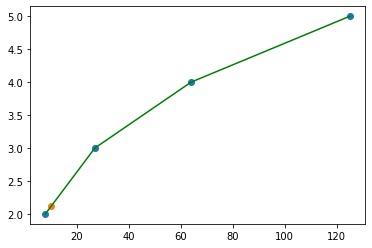

In [9]:
plt.scatter(x,y)
plt.plot(x,y,'g')
plt.scatter(a,ans)
plt.show()